# 1. Import Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Dataset/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 2. Data Preprocessing

In [3]:
important_cols = ['Age', 'Vehicle_Age_0', 'Vehicle_Age_1', 'Vehicle_Age_2', 'Previously_Insured', 'Vehicle_Damage']
output_cols = ['Response']

In [4]:
df['Vehicle_Age_0'] = df['Vehicle_Age'].apply(lambda x: 1 if x == '< 1 Year' else 0)
df['Vehicle_Age_1'] = df['Vehicle_Age'].apply(lambda x: 1 if x == '1-2 Year' else 0)
df['Vehicle_Age_2'] = df['Vehicle_Age'].apply(lambda x: 1 if x == '> 2 Years' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)
df = df[important_cols + output_cols]
df.head()

,Age,Vehicle_Age_0,Vehicle_Age_1,Vehicle_Age_2,Previously_Insured,Vehicle_Damage,Response
0,44,0,0,1,0,1,1
1,76,0,1,0,0,0,0
2,47,0,0,1,0,1,1
3,21,1,0,0,1,0,0
4,29,1,0,0,1,0,0


# 3. Resampling Imbalance Dataset

## 3.1. Way 1: decrease the number of majority class

<AxesSubplot:xlabel='Response', ylabel='count'>

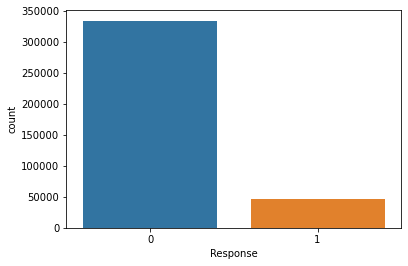

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(x='Response', data=df[['Response']])

In [13]:
#data is imbalance, response = 0 is much more than response = 1, remove some rows of response = 0
df_balance = df[df['Response'] == 1]
df_balance = df_balance.append(df[df['Response'] == 0].sample(n=46710, random_state=123))

C:\Users\Admin\AppData\Local\Temp\ipykernel_41196\3887642575.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balance = df_balance.append(df[df['Response'] == 0].sample(n=46710, random_state=123))


## 3.2. Way 2: increase the number of minority class

<AxesSubplot:xlabel='Response', ylabel='count'>

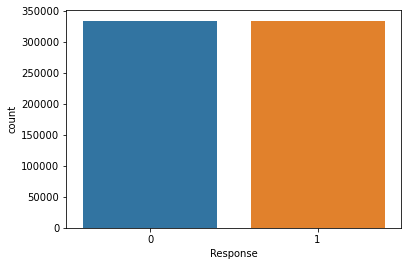

In [7]:
#data is imbalanced, so we need to balance it, resample dataset
from sklearn.utils import resample
df_majority = df[df['Response'] == 0]
df_minority = df[df['Response'] == 1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=334399, random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['Response'].value_counts()

sns.countplot(x='Response', data=df_upsampled[['Response']])

# 4. Training Model

In [9]:
#training Random Forest model by scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#split data into train and test
X = df_upsampled[important_cols]
y = df_upsampled[output_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
#train model
rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_train, y_train)

#predict
y_pred = rf.predict(X_test)

C:\Users\Admin\AppData\Local\Temp\ipykernel_60828\130488559.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [11]:
#evaluate
#confusion matrix
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
#Acuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))

Confusion matrix:  [[42563 24176]
 [ 3546 63475]]
Accuracy:  0.7927482057416267


# 4. Export Model

In [12]:
import os
import joblib
import numpy as np

In [13]:
#save
joblib.dump(rf, 'model_Random_Forest_K20411.pkl')

['model_Random_Forest_K20411.pkl']

# 5. Load Model

In [14]:
import os
import joblib
import numpy as np

In [15]:
#load model
rf_load = joblib.load('model_Random_Forest_K20411.pkl')

In [16]:
#predict
y2_predict = rf_load.predict(X_test)

In [17]:
y2_predict.shape

(133760,)

In [20]:
y2_predict[0]


1